<a href="https://colab.research.google.com/github/MeghaUkkali9/Advanced-Machine-Learing/blob/master/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project#: 5

 Name: Megha Ukkali & Sagar Pandya

Course: Advanced Machine Learning

 Submission Date: 03/25/2020

#Project5 Tasks
1.Read this background paper (Links to an external site.) to familiarize yourself with the problem.

2.Perform data scrubbing to deal with missing data, and then scale the data. 

3.Find out which features have most influence on patients with diabetes or being readmitted, e.g., age, race, weight, blood pressure, etc.

4.Use RF and SVM (linear as well as nonlinear kernels , as necessary) to learn classification of diabetic patients and those being readmitted.

5.If using a LinearSVC, also use SVC and SGDClassifier to see if you can get them to roughly produce the same model.

6.Calculate and present performance parameters (e.g. accuracy, etc.) of each model using appropriate graphs such as bar charts.

#Upload the Diabetes dataset from the git hub.

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
import os
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/MeghaUkkali9/Advanced-Machine-Learing/master/"
Diabetes_PATH = os.path.join("datasets", "dataset_diabetes")
Diabetes_URL = DOWNLOAD_ROOT + "datasets/dataset_diabetes/diabetic_data.csv"

def fetch_diabetes_data(Diabetes_url=Diabetes_URL, Diabetes_path=Diabetes_PATH):
    if not os.path.isdir(Diabetes_path):
        os.makedirs(Diabetes_path)
    tgz_path = os.path.join(Diabetes_path, "diabetic_data.csv")
    urllib.request.urlretrieve(Diabetes_url, tgz_path)

In [0]:
fetch_diabetes_data()

# Import Dataset

In [0]:
import pandas as pd

def load_diabetesdata_data(Diabetes_path=Diabetes_PATH):
    csv_path = os.path.join(Diabetes_path, "diabetic_data.csv")
    return pd.read_csv(csv_path)

In [6]:
diabetesdata = load_diabetesdata_data()
diabetesdata.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Data contains ? and still it is showing no null values in the dataset.

In [7]:
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

Dataset contains categorical attributes and missing values.

In [8]:
diabetesdata.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Replacing ? with the NAN value

In [0]:
import numpy as np

df = diabetesdata.replace('?',np.nan)

In [10]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


So many missing Values are present in the diabetes dataset. So Weight column and payer code is removed. And It will not effect to much on removing.

In [0]:
df=df.drop("weight", axis=1)

In [0]:
df=df.drop("payer_code", axis=1)

In [13]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

There are missing data in categorical data:
We have to resolve these missing data before moving on to find correlation

Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the fillna function.

In [0]:
df['race'] = df['race'].fillna('UNKNOWN')
df['medical_specialty'] = df['medical_specialty'].fillna('MISSING')
df['diag_1'] = df['diag_1'].fillna('UNKNOWN')
df['diag_2'] = df['diag_2'].fillna('UNKNOWN')
df['diag_3'] = df['diag_3'].fillna('UNKNOWN')

In [15]:
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [16]:
print('Number of samples:',len(df))

Number of samples: 101766


From the above analysis we found that Weight and payer code have major missing data. So These two columns are removed.

- encounter_id and patient_nbr: these are not neccessary.
- examide and citoglipton have 1 value, so these two columns not in much use. So removed these columns.
- diag1, diag2, diag3 -not useful in this dataset. 


In [0]:
df.drop(columns = ['encounter_id','patient_nbr','citoglipton','examide','diag_1', 'diag_2', 'diag_3'],inplace=True)


In [18]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,MISSING,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,MISSING,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,MISSING,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,MISSING,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,MISSING,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,MISSING,70,1,21,0,0,0,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1,1,7,5,MISSING,73,0,12,0,0,0,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2,1,4,13,MISSING,68,2,28,0,0,0,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3,3,4,12,InternalMedicine,33,3,18,0,0,0,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Age column has categorical attribute. To convert to numberical attribute, the given range is replaced with the mean number.

In [0]:
age_id = {'[0-10)':5, 
          '[10-20)':15, 
          '[20-30)':25, 
          '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
df['age'] = df.age.replace(age_id)

In [20]:
for c in list(df.columns):
    
    n = df[c].unique()
 
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

race
['Caucasian' 'AfricanAmerican' 'UNKNOWN' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
[ 5 15 25 35 45 55 65 75 85 95]
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]
number_diagnoses
[ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
max_glu_serum
['None' '>300' 'Norm' '>200']
A1Cresult
['None' '>7' '>8' 'Norm']
metformin
['No' 'Steady' 'Up' 'Down']
repaglinide
['No' 'Up' 'Steady' 'Down']
nateglinide
['No' 'Steady' 'Down' 'Up']
chlorpropamide

In [0]:
cleanup_nums = {"metformin":     {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                "repaglinide":          {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "nateglinide":          {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "chlorpropamide":       {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "glimepiride":          {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "acetohexamide":        {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "glipizide":            {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "glyburide":            {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "tolbutamide":          {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "pioglitazone":         {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "rosiglitazone":        {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "acarbose":             {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "miglitol":             {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "troglitazone":         {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "tolazamide":           {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "insulin":              {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                 "glyburide-metformin":       {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                "glipizide-metformin":        {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                "glimepiride-pioglitazone":   {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                "metformin-rosiglitazone":    {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                "metformin-pioglitazone":     {"No": 0, "Steady": 1, "Down": 2,"Up": 3},
                "change":                     {"No": 0, "Ch": 1},
                "diabetesMed":                {"No": 0, "Yes": 1},
                "race":           {'Caucasian':1, 'AfricanAmerican': 2, 'UNKNOWN': 0, 'Other': 5, 'Asian': 3, 'Hispanic': 4},
                "gender":         {'Female': 1, 'Male': 2, 'Unknown/Invalid': 0},
                "max_glu_serum":  {'None': 0, 'Norm': 1, '>200': 2, '>300':3},
                "A1Cresult":      {'None': 0, 'Norm': 1, '>7':2, '>8':3},
                "readmitted":     {'NO': 0, '<30': 1, '>30': 2}}


In [22]:
df.replace(cleanup_nums, inplace=True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,5,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,15,1,1,7,3,MISSING,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,2
2,2,1,25,1,1,7,2,MISSING,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,2,35,1,1,7,2,MISSING,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
4,1,2,45,1,1,7,1,MISSING,51,0,8,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["medical_specialty"] = lb_make.fit_transform(df["medical_specialty"])

In [24]:
 df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,5,6,25,1,1,38,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,15,1,1,7,3,19,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,2
2,2,1,25,1,1,7,2,19,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,2,35,1,1,7,2,19,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
4,1,2,45,1,1,7,1,19,51,0,8,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


#The classification data for each attribute.


Plotting the classification data using matplotlib

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

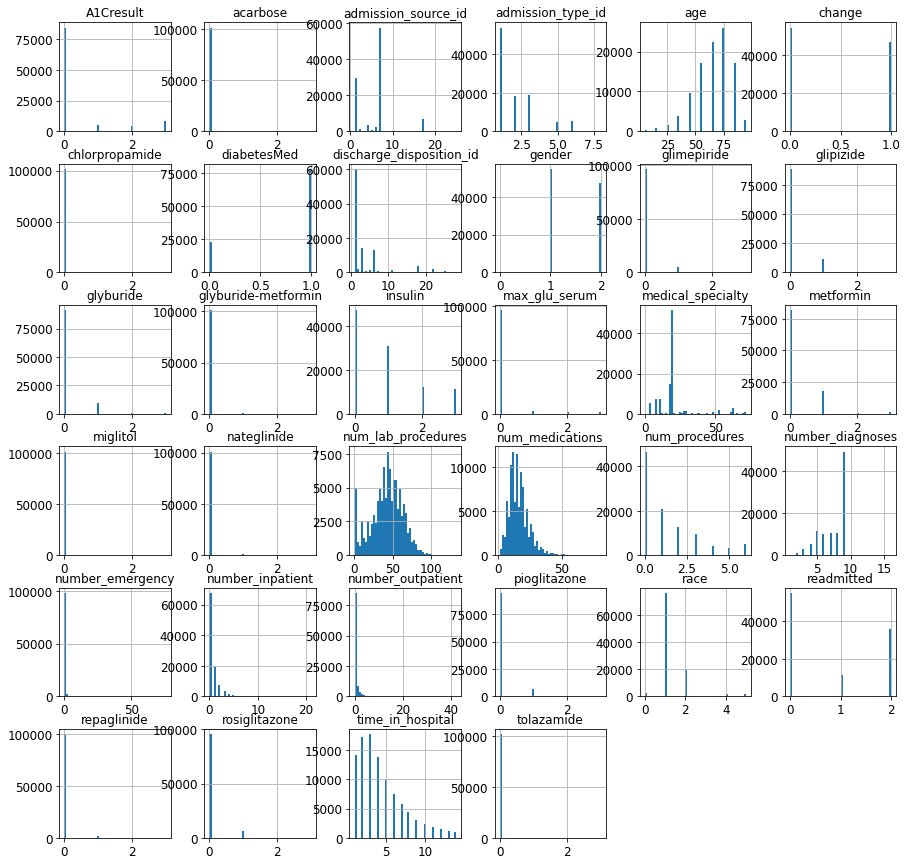

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,15))
plt.show()

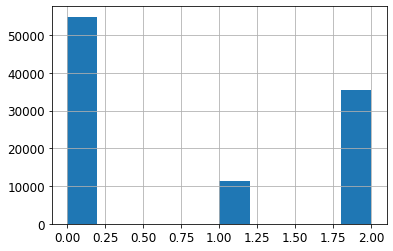

In [26]:
df["readmitted"].hist()

In [27]:
df.shape

(101766, 41)

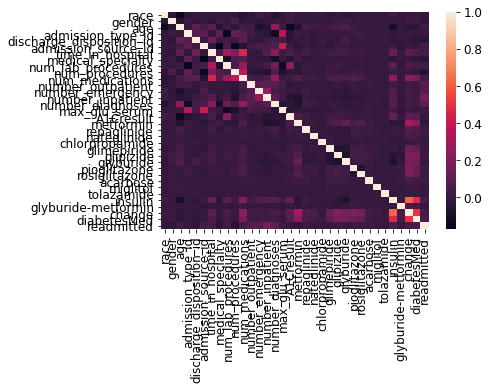

In [28]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
corr_matrix = df.corr()

In [30]:
corr_matrix["readmitted"].sort_values(ascending=False)

readmitted                  1.000000
number_inpatient            0.178208
number_diagnoses            0.104660
number_emergency            0.090516
number_outpatient           0.082255
diabetesMed                 0.057168
insulin                     0.053764
change                      0.043028
admission_source_id         0.041193
time_in_hospital            0.040309
num_medications             0.037399
num_lab_procedures          0.035441
age                         0.026816
glipizide                   0.019585
repaglinide                 0.015988
acarbose                    0.015842
max_glu_serum               0.015785
pioglitazone                0.014738
rosiglitazone               0.010224
miglitol                    0.007327
nateglinide                 0.004210
chlorpropamide              0.003713
glimepiride                 0.003578
glyburide-metformin         0.001117
admission_type_id          -0.001342
glyburide                  -0.001782
tolazamide                 -0.003079
A

In [0]:
df.drop(columns = ['num_procedures','medical_specialty','discharge_disposition_id','metformin','tolazamide', 'glyburide', 'admission_type_id','glyburide-metformin','glimepiride','chlorpropamide','nateglinide','miglitol'],inplace=True)

In [32]:
corr_matrix["readmitted"].sort_values(ascending=False)

readmitted                  1.000000
number_inpatient            0.178208
number_diagnoses            0.104660
number_emergency            0.090516
number_outpatient           0.082255
diabetesMed                 0.057168
insulin                     0.053764
change                      0.043028
admission_source_id         0.041193
time_in_hospital            0.040309
num_medications             0.037399
num_lab_procedures          0.035441
age                         0.026816
glipizide                   0.019585
repaglinide                 0.015988
acarbose                    0.015842
max_glu_serum               0.015785
pioglitazone                0.014738
rosiglitazone               0.010224
miglitol                    0.007327
nateglinide                 0.004210
chlorpropamide              0.003713
glimepiride                 0.003578
glyburide-metformin         0.001117
admission_type_id          -0.001342
glyburide                  -0.001782
tolazamide                 -0.003079
A

In [0]:
dfModfied = df.drop(columns = ['rosiglitazone','pioglitazone','max_glu_serum','acarbose','repaglinide','glipizide','age','num_lab_procedures','time_in_hospital','num_medications','admission_source_id','change','number_emergency','diabetesMed'],inplace=False)

In [34]:
'discharge_disposition_id', 'metformin', 'gender', 'race','tolazamide','A1Cresult','glyburide','admission_type_id', 

('discharge_disposition_id',
 'metformin',
 'gender',
 'race',
 'tolazamide',
 'A1Cresult',
 'glyburide',
 'admission_type_id')

In [0]:
dfModfied.head()
dfModfied.drop(columns = ['race','gender','A1Cresult','A1Cresult','tolbutamide','acetohexamide','troglitazone','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],inplace=True)

In [36]:
dfModfied.head()

,number_outpatient,number_inpatient,number_diagnoses,insulin,readmitted
0,0,0,1,0,0
1,0,0,9,3,2
2,2,1,6,0,0
3,0,0,7,3,0
4,0,0,5,1,0


In [0]:

dfModfied.drop(columns = ['number_outpatient','insulin'], inplace=True)

In [0]:
# to make this notebook's output identical at every run
import numpy as np

np.random.seed(42)

In [0]:
X_data = df.drop("readmitted", axis=1) 
y_data = df["readmitted"].copy()

In [40]:
X_data

,race,gender,age,admission_source_id,time_in_hospital,num_lab_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,repaglinide,acetohexamide,glipizide,tolbutamide,pioglitazone,rosiglitazone,acarbose,troglitazone,insulin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,1,1,5,1,1,41,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,15,7,3,59,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1
2,2,1,25,7,2,11,13,2,0,1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,2,35,7,2,44,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1
4,1,2,45,7,1,51,8,0,0,0,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2,2,75,7,3,51,16,0,0,0,9,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1
101762,2,1,85,5,5,33,18,0,0,1,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
101763,1,2,75,7,1,53,9,1,0,0,13,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1
101764,1,1,85,7,10,45,21,0,0,1,9,0,0,0,0,1,0,1,0,0,0,3,0,0,0,0,1,1


In [41]:
X_data.shape

(101766, 28)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [43]:
len(X_train)

81412

In [44]:
len(X_test)

20354

#Prepare the data for Model

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

In [46]:
X_train_reduced.shape

(81412, 3)

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [48]:
d

3

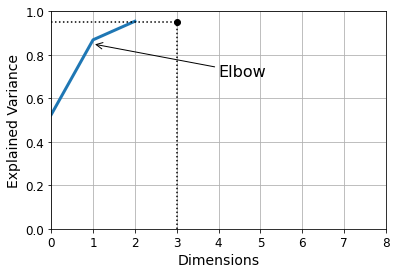

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(1, 0.85), xytext=(4, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()


In [50]:
np.sum(pca.explained_variance_ratio_)

0.9545314830326453

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

#Use RF and SVM (linear as well as nonlinear kernels , as necessary) to learn classification of diabetic patients and those being readmitted.

#Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=100, random_state=42)
rnd_clf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [54]:
rnd_clf_pred = rnd_clf.predict(X_test_scaled)
rnd_clf_pred

array([0.59, 0.4 , 0.76, ..., 0.91, 0.49, 0.66])

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rnd = mean_squared_error(y_test, rnd_clf_pred)
rmse_rnd = np.sqrt(mse_rnd)
print("Root Mean Squared Error:",rmse_rnd)
print("Mean Absolute Error:", mean_absolute_error(y_test, rnd_clf_pred))
# variance score: 1 is perfect prediction
print("R-squared:", r2_score(y_test, rnd_clf_pred))

Root Mean Squared Error: 0.9113293307387907
Mean Absolute Error: 0.8227330827683337
R-squared: 0.025480796086207236


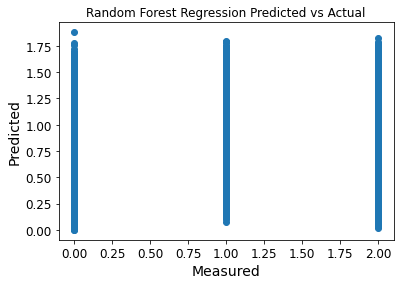

In [56]:
plt.scatter(y_test, rnd_clf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Predicted vs Actual')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_predict

y_train_pred_sc = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)
y_train_pred_sc

array([0.36, 0.09, 0.59, ..., 0.77, 0.56, 0.58])

#Support Vector Machine

#SVM 
Linear Kernel

In [67]:
from sklearn.svm import LinearSVC

svm_linear_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_linear_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [68]:
svm_clf_score = svm_linear_clf.score(X_test_scaled, y_test)
svm_clf_score

0.5586616881202712

In [0]:
svm_clf_pred = svm_clf.predict(X_test_scaled)

In [0]:
from sklearn.metrics import mean_squared_error

svm_reg_mse = mean_squared_error(y_test, svm_clf_pred)
svm_reg_rmse = np.sqrt(svm_reg_mse)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Root Mean Squared Error:",svm_reg_rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, svm_clf_pred))
print("Mean Squred Error(MSE) : ", mean_squared_error(y_test, svm_clf_pred))
print("R-squared:", r2_score(y_test, svm_clf_pred))

Root Mean Squared Error: 1.1952256732282784
Mean Absolute Error: 0.7704136779011497
Mean Squred Error(MSE) :  1.4285644099439914
R-squared: -0.6762528601298192


In [72]:
svm_clf.intercept_, svm_clf.coef_

(array([ 0.45568222, -0.99999999, -0.9999494 ]),
 array([[ 2.99916513e-05, -8.88079818e-06,  3.13173858e-05,
          3.88559129e-05,  4.00645357e-06, -2.66717557e-05,
          5.02466444e-07, -1.68866728e-01, -3.23902428e-01,
         -8.44320135e-01,  3.50800564e-06, -1.27236555e-05,
          1.49686715e-05, -1.75741599e-06, -7.00836033e-03,
          1.95937807e-07,  2.08199606e-02,  2.39170752e-05,
          7.69113940e-06, -3.96677699e-02, -6.34319482e-06,
         -2.28868146e-05,  4.97707465e-07, -2.34076271e-03,
          3.29578696e-03, -1.80045238e-06,  3.45876278e-05,
         -3.13611859e-05],
        [-3.92715755e-14, -3.48296786e-14, -6.31448333e-15,
          1.11657347e-14,  3.27753132e-14,  7.72944733e-14,
          7.30520800e-14, -6.30170118e-14,  2.23096751e-14,
         -3.60510149e-14, -1.88888409e-14, -2.53103061e-15,
          6.92200356e-14, -9.18119860e-15, -3.69870317e-15,
         -8.36426962e-14,  3.80745428e-15,  5.58368107e-14,
         -3.26371541e-15

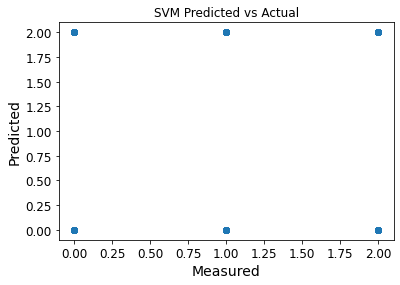

In [73]:
plt.scatter(y_test, svm_clf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('SVM Predicted vs Actual')
plt.show()

#SVC

In [54]:
from sklearn.svm import SVC

svc_clf = SVC(gamma="scale")
svc_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svc_clf_score = svc_clf.score(X_test_scaled, y_test)
svc_clf_score

In [0]:
svc_clf_pred = svc_clf.predict(X_test_scaled)

In [0]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [0]:
from sklearn.metrics import mean_squared_error

svc_reg_mse = mean_squared_error(y_test, svc_clf_pred)
svc_reg_rmse = np.sqrt(svc_reg_mse)

In [58]:
print("Root Mean Squared Error:",svc_reg_mse)
print("Mean Absolute Error:", mean_absolute_error(y_test, svc_clf_pred))
print("Mean Squred Error(MSE) : ", mean_squared_error(y_test, svc_clf_pred))
print("R-squared:", r2_score(y_test, svc_clf_pred))

Root Mean Squared Error: 1.388572270806721
Mean Absolute Error: 0.750564999508696
Mean Squred Error(MSE) :  1.388572270806721
R-squared: -0.6293267732520231


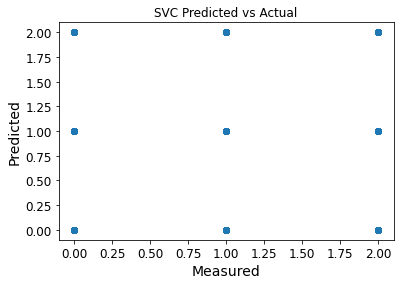

In [60]:
plt.scatter(y_test, svc_clf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('SVC Predicted vs Actual')
plt.show()

#SGD Classifier

In [0]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_scaled, y_train.ravel())
sgd_clf_pred = sgd_clf.predict(X_test_scaled)

In [0]:

from sklearn.metrics import mean_squared_error

sgd_clf_mse = mean_squared_error(y_test, sgd_clf_pred)
sgd_clf_rmse = np.sqrt(sgd_clf_mse)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Root Mean Squared Error:",sgd_clf_rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, sgd_clf_pred))
print("Mean Squred Error(MSE) : ", mean_squared_error(y_test, sgd_clf_pred))
print("R-squared:", r2_score(y_test, sgd_clf_pred))

Root Mean Squared Error: 1.1917265807615862
Mean Absolute Error: 0.7662867249680653
Mean Squred Error(MSE) :  1.4202122432937014
R-squared: -0.6664525717155374


In [65]:
sgd_clf.intercept_, sgd_clf.coef_

(array([ 0.31890243, -1.06721731, -0.91970689]),
 array([[ 2.35130727e-02,  2.20517150e-02, -3.75493915e-02,
          2.64393143e-02,  2.80150899e-02,  5.79474697e-03,
         -1.13020859e-01, -1.97510338e-01, -3.09264219e-01,
         -7.91269813e-01, -6.61894736e-02,  1.92544620e-02,
         -1.22540401e-02, -8.84961581e-02, -9.73284868e-01,
         -6.95790202e-03, -3.20801549e-04,  7.58226408e-02,
          1.99539034e-02, -1.06031099e-03, -5.62015982e-01,
         -5.83690420e-02, -2.48479604e-04, -9.73284868e-01,
          6.88068391e-01,  9.73141418e-01,  2.20598878e-02,
          1.93064647e-02],
        [-3.62871254e-02, -3.51857287e-03, -1.00904807e-03,
         -2.11666759e-02,  2.82462410e-03,  1.65246517e-03,
          1.83836181e-02, -4.07662317e-02,  1.38401297e-02,
          3.90186917e-02, -8.95335162e-04, -1.22607102e-02,
         -1.66795513e-02, -2.45904653e-02, -1.75696409e-03,
          9.99109646e-03, -7.85829911e-03,  7.93234827e-03,
         -1.03554687e-02

In [0]:
plt.scatter(y_test, sgd_clf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('SGD Regression Predicted vs Actual')
plt.show()

#If using a LinearSVC, also use SVC and SGDClassifier to see if you can get them to roughly produce the same model.

In [0]:
X = dfModfied.drop("readmitted", axis=1)  # petal length, petal width
y = df["readmitted"]

In [64]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

lin_clf = LinearSVC(loss="hinge", C=1, random_state=42)
svm_clf = SVC(kernel="linear", C=1)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha= 1 / (1 * len(X)),
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled[:40000], y[:40000])
svm_clf.fit(X_scaled[:40000], y[:40000])
sgd_clf.fit(X_scaled[:40000], y[:40000])

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [ 0.5762894 -1.        -1.       ] [[-8.41904724e-01 -1.65619767e-13]
 [-1.74228788e-14  3.59948264e-14]
 [ 2.26657578e-14 -4.77938936e-14]]
SVC:                          [ 1.00001596  0.68204921 -0.99997133] [[ 3.56621854e-06 -4.29516297e-06]
 [-6.31382774e-01 -1.72110444e-04]
 [-3.37106121e-06  2.49364793e-05]]
SGDClassifier(alpha=0.00001): [ 0.56  -1.    -0.993] [[-8.55218130e-01 -8.23797769e-04]
 [ 4.44928095e-04 -2.07899792e-04]
 [ 1.59017295e-02 -3.29381885e-03]]


Let's plot the decision boundaries of these three models:

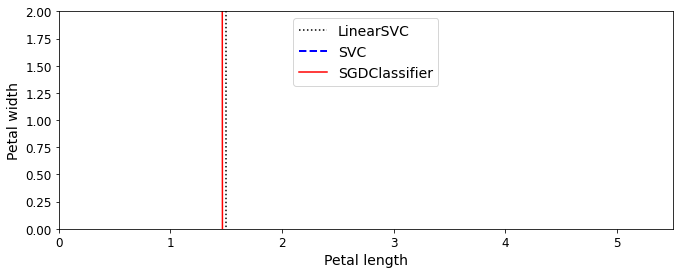

In [66]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

AS we can see above LinearSVC and SGDClassifier are very close to each other. Wheras we are unable to see SVC line.

#Learning curve

In [0]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.figure(figsize=(10,6))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [0]:
plot_learning_curves(rnd_clf, X_data[:10000], y_data[:10000])
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show()

In [0]:
plot_learning_curves(svm_linear_clf, X_data[:10000], y_data[:10000])
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show()